In [ ]:
##This code is for finding the training error for GD for 10 independent trials
##regression (squared loss), fixed design
##2-layer ReLU with weight decay
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np

In [ ]:
n=5 # number of samples
d=2 # dimension of the data
beta=1e-3 #regularisation parameter
num_trials = 10
learning_rate = 0.01

#Adjust variables for each experiment
m=50 # number of neurons
num_epochs = 4000
optimal_loss = 0.0013650796475785669
dv=0.1 #standard deviation of error in data

#Size of the output plot
y_top=1.1  #upper limit of y in the final plot
y_bottom=1e-3 #lower limit of y in the final plot
x_left=0 #lower limit of x
x_right=num_epochs #upper limit of x

In [ ]:
#Input data
X = torch.tensor([[1.0, -2.0],
                  [1.0, -1.0],
                  [1.0, 0.0],
                  [1.0, 1.0],
                  [1.0, 2.0]], dtype=torch.float32)

Y = torch.tensor([1.0, 1.0, 1.0, -1.0, -1.0], dtype=torch.float32)
# Fix the random seed for reproducibility
torch.manual_seed(42)
# Generate Gaussian noise with the same shape as Y (mean=0, std=dv)
noise = dv*torch.randn_like(Y)

# Add Gaussian noise to Y
Y = Y + noise

In [ ]:
print(X)
print(Y)

tensor([[ 1., -2.],
        [ 1., -1.],
        [ 1.,  0.],
        [ 1.,  1.],
        [ 1.,  2.]])
tensor([ 1.0337,  1.0129,  1.0234, -0.9770, -1.1123])


In [ ]:
#Set the GD optimizer
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=5, shuffle=False)


In [ ]:
# Define the Neural Network model with 2 layers
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim, bias=False)  # First layer
        self.layer2 = nn.Linear(hidden_dim, output_dim, bias=False)  # Second layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # ReLU activation function applied after the first layer
        x = self.layer2(x)  # Output layer (no activation)
        return x

In [ ]:
# Set dimensions of NN
input_dim = d   # input dimension
hidden_dim = m  # Hidden layer dimension
output_dim = 1  # 1D output

In [ ]:
# Define Mean Squared Error (MSE) loss
#We will add weight decay (L2 regularization) later
criterion = nn.MSELoss()

In [ ]:
# Store losses for each trial
all_losses = []


In [ ]:
# Track the loss values for plotting


for trial in range(num_trials):
    X = X.float()
    Y = Y.float()
    # Set random seed for reproducibility
    torch.manual_seed(trial)
    np.random.seed(trial)

    # Initialize model and optimizer
    #The model's parameters (weights) are initialized randomly at the start of each trial.
    model = SimpleNN(input_dim, hidden_dim, output_dim)
    #The optimizer starts with a fresh state for each trial,
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=beta)  # weight_decay is the L2 penalty
    # Training loop
    trial_losses = []
    for epoch in range(num_epochs):
      epoch_loss = 0  # Initialize epoch loss which stores average loss for each epoch
      for batch_X, batch_Y in dataloader:
        optimizer.zero_grad() #Clear gradients for each iteration
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss +=loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters())

      trial_losses.append(epoch_loss / len(dataloader))
      # Track loss
      if (epoch + 1) %  num_epochs== 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(dataloader):.4f}')

    all_losses.append(trial_losses)

Epoch [4000/4000], Loss: 1.0363
Epoch [4000/4000], Loss: 1.0350
Epoch [4000/4000], Loss: 1.0348
Epoch [4000/4000], Loss: 1.0369
Epoch [4000/4000], Loss: 1.0374
Epoch [4000/4000], Loss: 1.0368
Epoch [4000/4000], Loss: 1.0348
Epoch [4000/4000], Loss: 1.0350
Epoch [4000/4000], Loss: 1.0364
Epoch [4000/4000], Loss: 1.0363


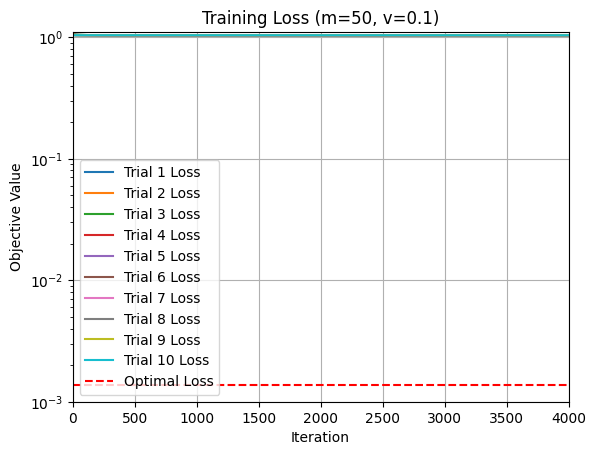

In [ ]:
# Plot the log of trial loss over the number of epochs
fig, ax = plt.subplots() # Create a figure and axes object

for trial in range(num_trials):
    ax.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-') # Plot on the axes object
ax.set_ylim(bottom=y_bottom, top=y_top)
ax.set_xlim(left=x_left, right=x_right)
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Value')
ax.set_title(f'Training Loss (m={m}, v={dv})')
# Plot a horizontal line indicating the optimal value
ax.axhline(y=optimal_loss, color='r', linestyle='--', label=f'Optimal Loss')
ax.grid(True)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Display the legend
ax.legend(loc='lower left')

# Save the plot
#plt.savefig('losses_plot.png')

plt.show()

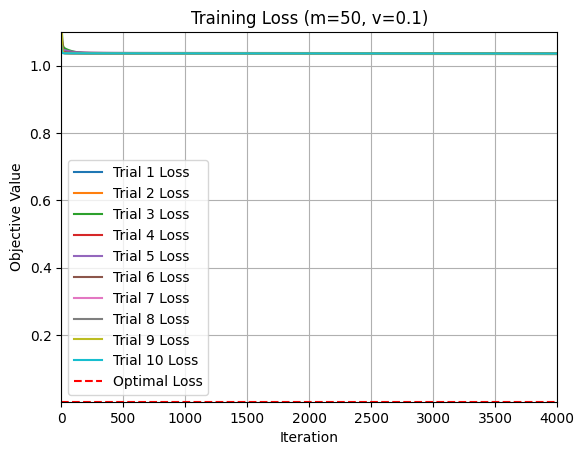

In [ ]:
# Plot the trial loss over the number of epochs
for trial in range(num_trials):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
plt.ylim(bottom=y_bottom, top=y_top)
plt.xlim(left=x_left, right=x_right)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title(f'Training Loss (m={m}, v={dv})')
# Plot a horizontal line indicating the optimal value
plt.axhline(y=optimal_loss, color='r', linestyle='--', label=f'Optimal Loss')
plt.grid(True)

# Display the legend
plt.legend(loc='lower left')

# Save the plot
#plt.savefig('losses_plot.png')

plt.show()